In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#inicialización
graph = nx.Graph()

In [3]:
#leer el archivo de datos a analizar
df_hr = pd.read_csv('df_people.csv',encoding='latin-1')

In [4]:
#Cargar las relaciones
text_relaciones = open("relaciones_contactos.txt", "r")

In [5]:
relaciones = [('Maxi','Maria'),('Pedro','Juana'),('Fermin','Juan'),('Fermin','Emma')
              ,('Fermin','Luis'),('Juan','Emma'),('Emma','Juan'),('German','Mario')
              ,('German','Seba'),('Mario','Seba'),('Jose','Adrian'),('Jose','Adriana')
              ,('Adrian','Adriana'),('Adrian','Esteban'),('Adriana','Esteban'),('Marcos','Maria')
              ,('Marcos','Pedro'),('Marcos','Fermin'),('Marcos','Jose'),('Maria','Fermin')
              ,('Maria','German'),('Maria','Jose'),('Maria','Adrian'),('Pedro','Fermin')
              ,('Pedro','Jose'),('Pedro','Marina'),('Pedro','Maxi'),('Fermin','Marina')
              ,('Fermin','Jose'),('Fermin','German')]

In [6]:
#agrego conexiones
for node_a,node_b in relaciones:
    graph.add_edge(node_a,node_b)

In [7]:
df_hr.set_index('nombre').head(3)

,area,genero,rol,años_en_empresa
nombre,,,,
Maxi,Sistemas,Masculino,Empleado,1
Maria,Sistemas,Femenino,Coordinador,5
Pedro,Finanzas,Masculino,Coordinador,3


In [8]:
#recorro el dataframe y agrego todos los nodos y sus atributos
for index, row in df_hr.iterrows():
    graph.add_node(row['nombre'],area=row['area'],genero=row['genero'],rol=row['rol'])

In [9]:
generos=nx.get_node_attributes(graph,'genero')
roles=nx.get_node_attributes(graph,'rol')

In [10]:
#asigno color de acuerdo al genero y reemplazo en el dict
#Masculino Verde
#Femenino Naranja
for key, value in generos.items():
    generos[key] = 'green' if generos[key] == 'Masculino' else 'orange'

In [13]:
#asigno color de acuerdo al genero y reemplazo en el dict --- NO SE PUEDE SETEAR DISTINTOS SHAPES POR NODO
#Coordinador nodo grande
#Empelado nodo pequeño
#for key, value in roles.items():
#    roles[key] = 'D' if roles[key] == 'Coordinador' else ''

In [14]:
#asigno color de acuerdo al degree del nodo y reemplazo en el dict
#alto degree nodo grande
#bajo degree nodo pequeño
dg = nx.degree(graph)
degree_persons = [dg[node] * 1400 for node in graph.nodes()]

In [62]:
#vector de valor propio
eigenvector_centrality = nx.eigenvector_centrality(graph)
eigenvector_centrality_arr = np.asarray([eigenvector_centrality[n] for n in eigenvector_centrality])

In [63]:
#vector de intermediarios
betweenness_centrality = nx.betweenness_centrality(graph)
betweenness_centrality_arr = np.asarray([betweenness_centrality[n] for n in betweenness_centrality])

In [64]:
#vector de cercania
closeness_centrality = nx.closeness_centrality(graph)
closeness_centrality_arr = np.asarray([closeness_centrality[n] for n in closeness_centrality])

In [34]:
dcg
degree_cen_persons = np.asarray([dcg[n] for n in dcg])

In [35]:
color_genero = [generos[node] for node in graph.nodes()]
shape_roles = [roles[node] for node in graph.nodes()]

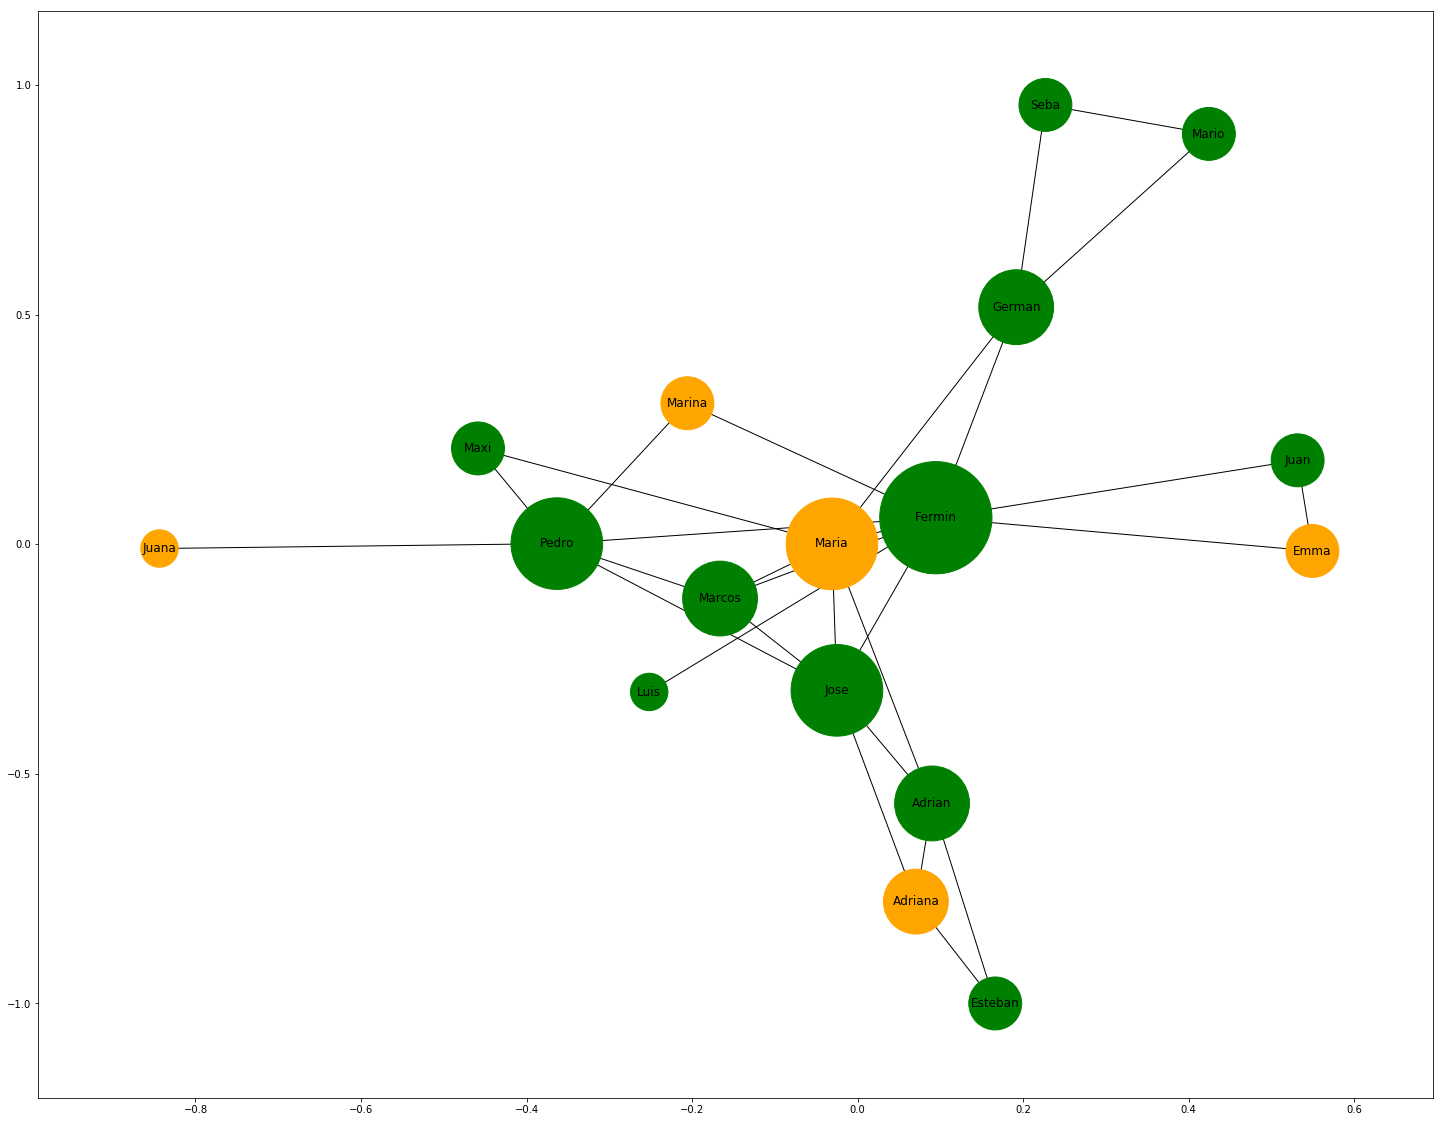

In [44]:
#dibujo el grafo
pos = nx.layout.spring_layout(graph)
plt.figure(figsize=(25, 20))
nx.draw_networkx(graph, pos=pos, node_color= color_genero, node_size= degree_persons, node_shape='o')

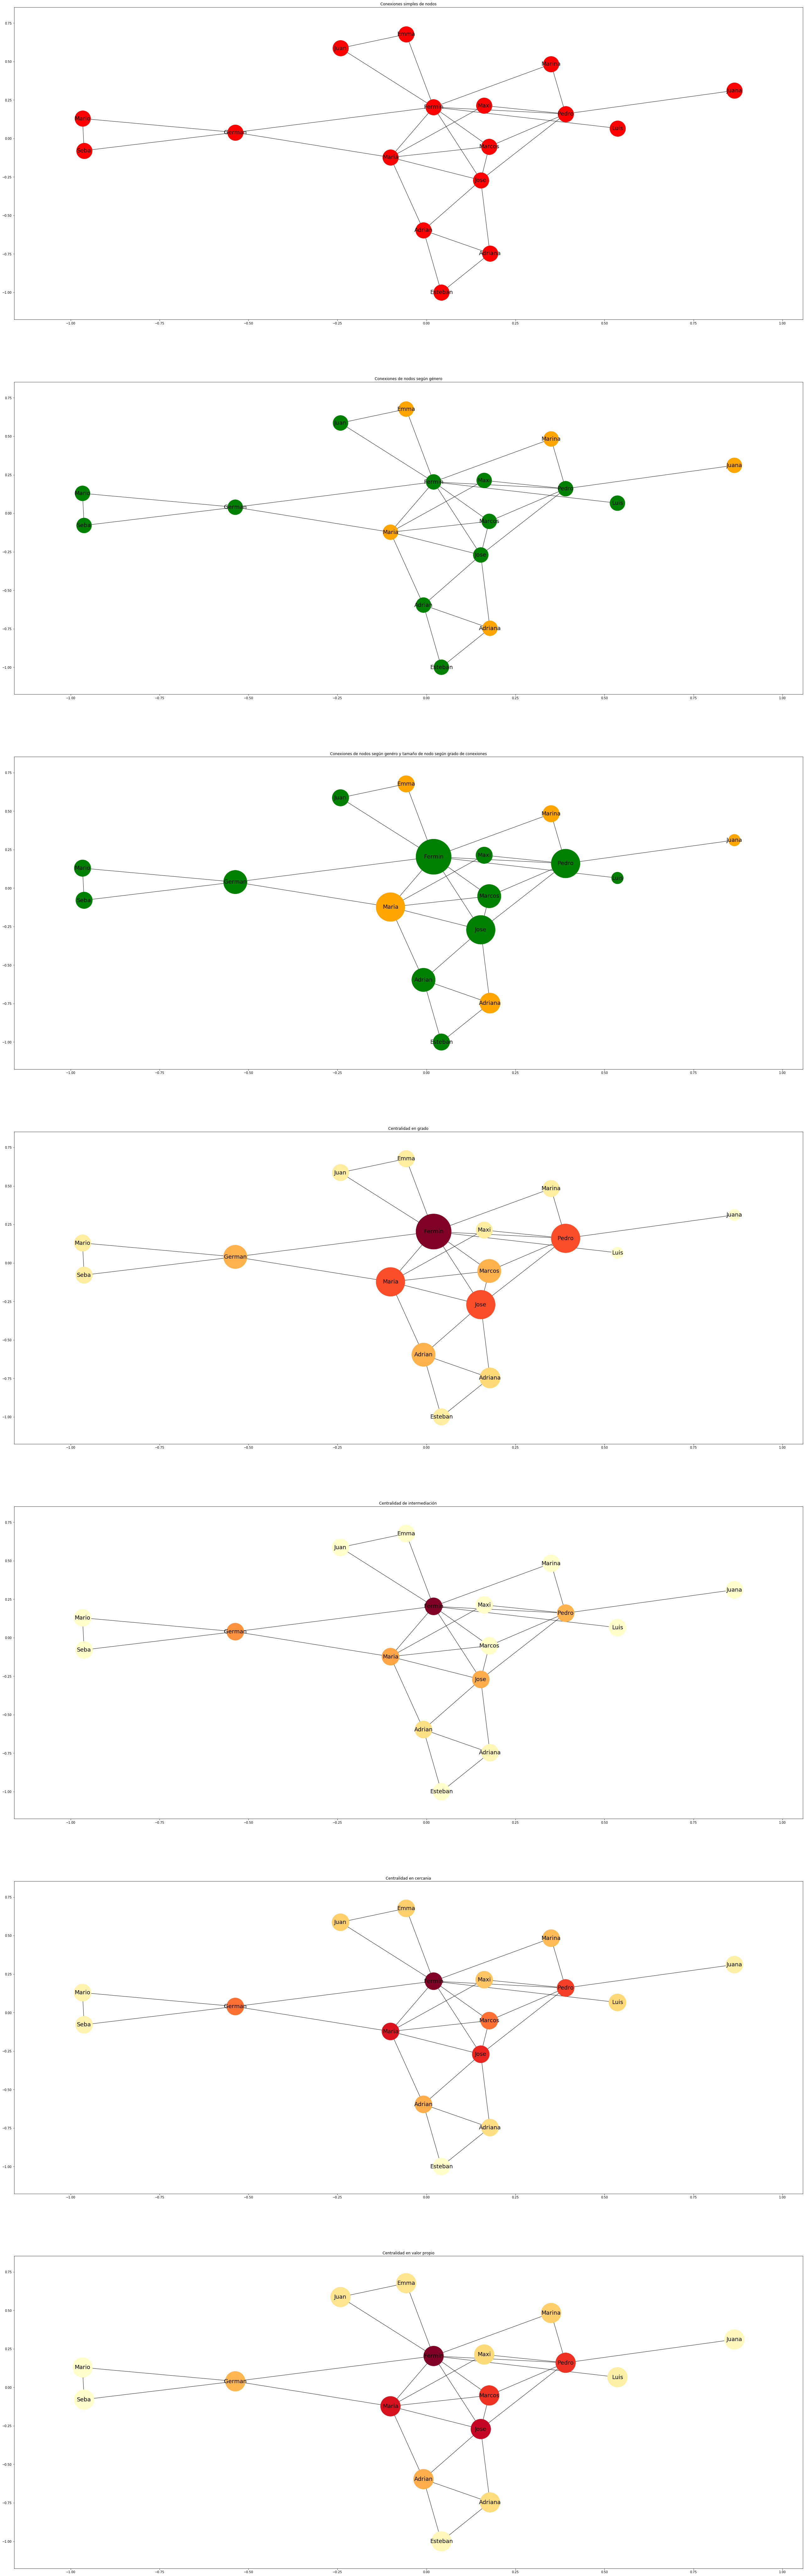

In [70]:
# AGREGO COLUMNAS DE GRAFICOS (sin color, y con color), PARA DIFERENCIARLOS, Y DEJO FIJO LOS NODOS.
#dejo fijo los nodos
pos = nx.layout.spring_layout(graph)

fig, ax = plt.subplots(7, 1, figsize=(45, 150))

first_plot = ax[0]
second_plot = ax[1]
third_plot = ax[2]
forth_plot = ax[3]
fifth_plot = ax[4]
sixth_plot = ax[5]
seventh_plot = ax[6]

ax[0].set_title('Conexiones simples de nodos')
ax[1].set_title('Conexiones de nodos según género')
ax[2].set_title('Conexiones de nodos según genéro y tamaño de nodo según grado de conexiones')
ax[3].set_title('Centralidad en grado')
ax[4].set_title('Centralidad de intermediación ')
ax[5].set_title('Centralidad en cercania')
ax[6].set_title('Centralidad en valor propio')

nx.draw_networkx(graph, pos=pos, ax = first_plot , node_size = 2500,font_color='k',font_size='18')
nx.draw_networkx(graph, pos=pos, ax = second_plot, node_color= color_genero, node_size = 2300,font_color='k',font_size='18')
nx.draw_networkx(graph, pos=pos, ax = third_plot, node_color= color_genero, node_size= degree_persons, node_shape='o',font_color='k',font_size='18')
nx.draw_networkx(graph, pos=pos, ax = forth_plot, node_color= degree_cen_persons, cmap='YlOrRd' ,node_size= degree_persons, node_shape='o',font_color='k',font_size='18')
nx.draw_networkx(graph, pos=pos, ax = fifth_plot, node_color= betweenness_centrality_arr , cmap='YlOrRd' , node_size = 3000, node_shape='o',font_color='k',font_size='18')
nx.draw_networkx(graph, pos=pos, ax = sixth_plot, node_color= closeness_centrality_arr, cmap='YlOrRd' , node_size = 3000, node_shape='o',font_color='k',font_size='18')
nx.draw_networkx(graph, pos=pos, ax = seventh_plot, node_color= eigenvector_centrality_arr, cmap='YlOrRd' , node_size = 4000, node_shape='o',font_color='k',font_size='18')

